In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# Read the CSV file
df = pd.read_csv('Add_4.csv')

In [7]:
df

,clean_line1,clean_line2,city,zip_code,label,phone,state,chain,has_phone_match,Success_Match_Rate,Phone_Success_Match_Rate
0,"Coalville , 84017 Holiday Hills ( 66 )",435-336-4421 I-80 Exit 162 ( UT 280 ),Coalville,84017,Holiday Hills ( 66 ),435-336-4421,UT,NaN,True,7/6 successful match,True
1,"Coalville , 84017 Hills ( 66 )",435-336-4421 I-80 Holiday Exit 162 ( UT 280 ),Coalville,84017,Hills ( 66 ),435-336-4421,UT,NaN,True,7/6 successful match,True
2,"D Coalville , 84017 Holiday Hills ( 66 ) )",4 435-336-4421 I-80 Exit 162 ( UT 280 ),Coalville,84017,Holiday Hills ( 66 ) ),435-336-4421,UT,NaN,True,7/6 successful match,True
3,D Coalville ( 84017 ) Holiday Hills ( 66 ),435-336-4421 I-80 Exit 162 ( UT 280 ),Coalville,84017,Holiday Hills ( 66 ),435-336-4421,UT,NaN,True,7/6 successful match,True
4,D Coalville ( 84017 ) Holiday Hills ( 66 ),4 435-336-4421 I-80 Exit 162 ( UT 280 ),Coalville,84017,Holiday Hills ( 66 ),435-336-4421,UT,NaN,True,7/6 successful match,True
...,...,...,...,...,...,...,...,...,...,...,...
2328,Corning ( 96021 ) Love's Travel Stop # 410,2 530-824-8767 I-5 Exit 630 ( South Ave ),Corning,96021,Love's Travel Stop # 410,530-824-8767,CA,Love's,True,7/6 successful match,True
2329,", 96021 Flying J Travel Plaza # 0510154",CCorning 2530-824-8770 I-5 Exit 630 ( South Ave ),NaN,96021,Flying J Travel Plaza # 0510154,530-824-8770,CA,Flying J,False,6/6 successful match,False
2330,"Corning , 96021 Flying J Travel Plaza # 0510154",2 530-824-8770 I-5 Exit 630 ( South Ave ),Corning,96021,Flying J Travel Plaza # 0510154,530-824-8770,CA,Flying J,False,6/6 successful match,False
2331,A Grenada ( 96038 ) 3 J's Food Mart ( 76 ),530-436-2208 I-5 Exit 766 ( CA A12 E ),Grenada,96038,3 J's Food Mart ( 76 ),530-436-2208,CA,NaN,False,7/6 successful match,False


# Analysis of Success Rates

Let's count how many rows have:
1. `Phone_Success_Match_Rate=True`
2. `Success_Match_Rate` equal to "6/6 successful match"
3. `Success_Match_Rate` equal to "7/6 successful match"

In [8]:
# Count rows where Phone_Success_Match_Rate is True
phone_success_count = df['Phone_Success_Match_Rate'].sum()
print(f"Number of rows with Phone_Success_Match_Rate=True: {phone_success_count}")

Number of rows with Phone_Success_Match_Rate=True: 1795


In [9]:
# Count rows where Success_Match_Rate is "6/6 successful match" or "7/6 successful match"
six_six_count = (df['Success_Match_Rate'] == '6/6 successful match').sum()
seven_six_count = (df['Success_Match_Rate'] == '7/6 successful match').sum()

print(f"Number of rows with Success_Match_Rate='6/6 successful match': {six_six_count}")
print(f"Number of rows with Success_Match_Rate='7/6 successful match': {seven_six_count}")

# Total count of rows with either condition
total_count = six_six_count + seven_six_count
print(f"Total rows with Success_Match_Rate='6/6 successful match' or '7/6 successful match': {total_count}")

Number of rows with Success_Match_Rate='6/6 successful match': 202
Number of rows with Success_Match_Rate='7/6 successful match': 1698
Total rows with Success_Match_Rate='6/6 successful match' or '7/6 successful match': 1900


In [10]:
# Count rows that meet any of the conditions (Phone_Success_Match_Rate=True OR Success_Match_Rate='6/6 successful match' OR Success_Match_Rate='7/6 successful match')
combined_condition = (
    df['Phone_Success_Match_Rate'] == True) | (
    df['Success_Match_Rate'] == '6/6 successful match') | (
    df['Success_Match_Rate'] == '7/6 successful match'
)

combined_count = combined_condition.sum()
print(f"Number of rows meeting any of the specified conditions: {combined_count}")
print(f"Percentage of total rows: {combined_count/len(df)*100:.2f}%")

Number of rows meeting any of the specified conditions: 2090
Percentage of total rows: 89.58%


# Summary of Results

From the analysis, we found that:

1. **Phone Success Match Rate**: 1,795 rows have `Phone_Success_Match_Rate=True`
2. **Success Match Rate**:
   - 202 rows have `Success_Match_Rate='6/6 successful match'`
   - 1,698 rows have `Success_Match_Rate='7/6 successful match'`
   - In total, 1,900 rows have either '6/6 successful match' or '7/6 successful match'

3. **Combined Results**: When considering rows that satisfy any of these conditions (`Phone_Success_Match_Rate=True` OR `Success_Match_Rate='6/6 successful match'` OR `Success_Match_Rate='7/6 successful match'`), we have 2,090 rows, which represents 89.58% of the total dataset.

This indicates that a significant majority of the records in your dataset have high success match rates.

# Analysis of Low Success Rates

Now let's identify the rows that do NOT have high success rates. These are rows that fail to meet any of these conditions:
- `Phone_Success_Match_Rate=True`
- `Success_Match_Rate='6/6 successful match'`
- `Success_Match_Rate='7/6 successful match'`

In [11]:
# Count rows that do NOT meet any of the high success rate conditions
low_success_condition = ~(
    (df['Phone_Success_Match_Rate'] == True) | 
    (df['Success_Match_Rate'] == '6/6 successful match') | 
    (df['Success_Match_Rate'] == '7/6 successful match')
)

low_success_count = low_success_condition.sum()
print(f"Number of rows NOT meeting any of the high success conditions: {low_success_count}")
print(f"Percentage of total rows: {low_success_count/len(df)*100:.2f}%")

Number of rows NOT meeting any of the high success conditions: 243
Percentage of total rows: 10.42%


In [12]:
# Let's look at the distribution of Success_Match_Rate for these low success rows
low_success_df = df[low_success_condition]

print("Distribution of Success_Match_Rate values in low success rows:")
success_rate_distribution = low_success_df['Success_Match_Rate'].value_counts().sort_index()
for rate, count in success_rate_distribution.items():
    print(f"- {rate}: {count} rows ({count/len(low_success_df)*100:.2f}% of low success rows)")

print("\nPhone_Success_Match_Rate values in low success rows:")
phone_success_distribution = low_success_df['Phone_Success_Match_Rate'].value_counts()
for value, count in phone_success_distribution.items():
    print(f"- {value}: {count} rows ({count/len(low_success_df)*100:.2f}% of low success rows)")

Distribution of Success_Match_Rate values in low success rows:
- 2/6 successful match: 28 rows (11.52% of low success rows)
- 4/6 successful match: 39 rows (16.05% of low success rows)
- 5/6 successful match: 176 rows (72.43% of low success rows)

Phone_Success_Match_Rate values in low success rows:
- False: 243 rows (100.00% of low success rows)


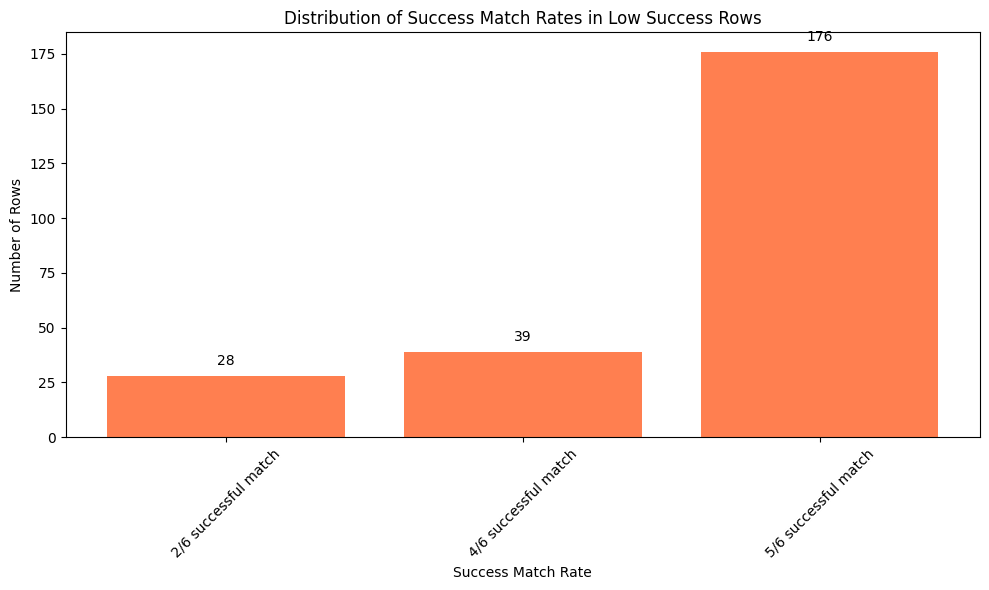

In [13]:
# Visualize the distribution of Success_Match_Rate in low success rows
plt.figure(figsize=(10, 6))
success_rates = success_rate_distribution.index
counts = success_rate_distribution.values

plt.bar(success_rates, counts, color='coral')
plt.xlabel('Success Match Rate')
plt.ylabel('Number of Rows')
plt.title('Distribution of Success Match Rates in Low Success Rows')
plt.xticks(rotation=45)

# Add data labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()

# Summary of Low Success Rates Analysis

From our analysis of the rows that do not meet the high success criteria, we found:

1. **Total Low Success Rows**: 243 rows (10.42% of the entire dataset) do not meet any of the high success conditions.

2. **Distribution of Success Match Rates** in these low success rows:
   - 176 rows (72.43%) have a Success Match Rate of "5/6 successful match"
   - 39 rows (16.05%) have a Success Match Rate of "4/6 successful match"
   - 28 rows (11.52%) have a Success Match Rate of "2/6 successful match"

3. **Phone Success Match Rate**: 100% of the low success rows have Phone_Success_Match_Rate = False.

This analysis shows that of the rows not meeting the high success criteria:
- The majority still have a relatively good success rate (5/6)
- None have Phone_Success_Match_Rate = True (which aligns with our criteria definition)
- The lowest match rate in the dataset is "2/6 successful match" (28 rows)

# Overall Distribution of Success Match Rates

Let's visualize the distribution of all Success Match Rates across the entire dataset to provide context:

Overall distribution of Success Match Rates in the entire dataset:
- 2/6 successful match: 34 rows (1.46% of all rows)
- 4/6 successful match: 48 rows (2.06% of all rows)
- 5/6 successful match: 351 rows (15.05% of all rows)
- 6/6 successful match: 202 rows (8.66% of all rows)
- 7/6 successful match: 1698 rows (72.78% of all rows)


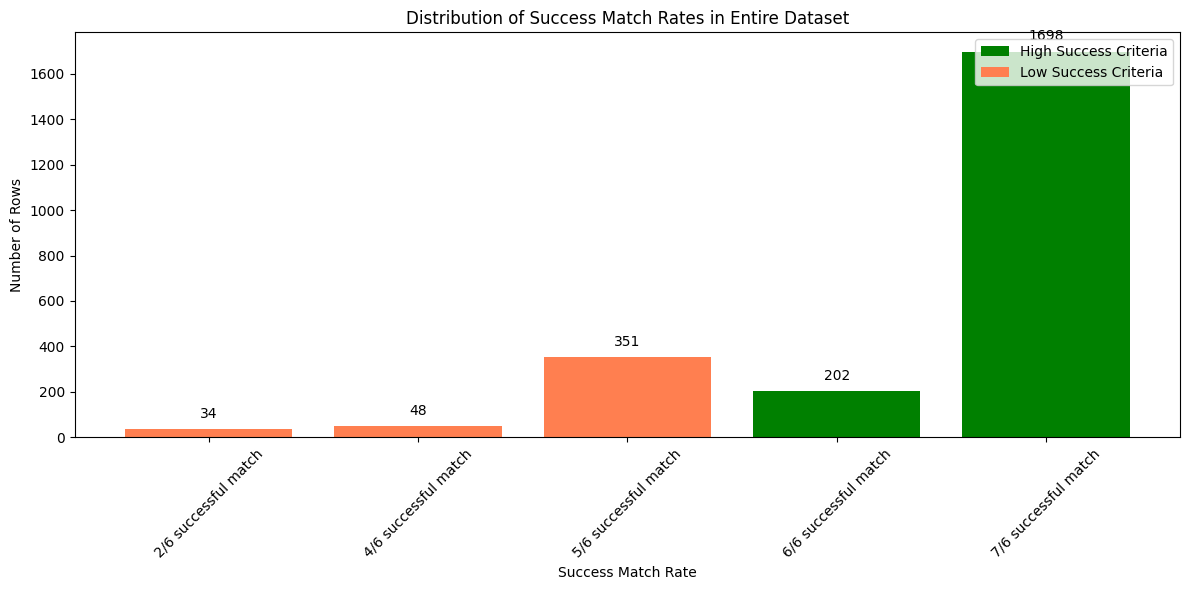

In [14]:
# Get the overall distribution of Success Match Rates
all_success_distribution = df['Success_Match_Rate'].value_counts().sort_index()
print("Overall distribution of Success Match Rates in the entire dataset:")
for rate, count in all_success_distribution.items():
    print(f"- {rate}: {count} rows ({count/len(df)*100:.2f}% of all rows)")

# Visualize the distribution
plt.figure(figsize=(12, 6))
success_rates = all_success_distribution.index
counts = all_success_distribution.values

# Create color mapping - high success rates in green, others in coral
colors = ['coral', 'coral', 'coral', 'green', 'green']
if len(success_rates) != len(colors):
    # Fallback if the number of unique rates doesn't match our expected colors
    colors = ['green' if rate in ['6/6 successful match', '7/6 successful match'] else 'coral' for rate in success_rates]

plt.bar(success_rates, counts, color=colors)
plt.xlabel('Success Match Rate')
plt.ylabel('Number of Rows')
plt.title('Distribution of Success Match Rates in Entire Dataset')
plt.xticks(rotation=45)

# Add data labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center')

# Add a legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='High Success Criteria'),
    Patch(facecolor='coral', label='Low Success Criteria')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# Final Conclusions

Based on our comprehensive analysis of the success rates in the dataset:

## High Success Rates (89.58% of the dataset)
- **Phone Success Match Rate**: 1,795 rows have Phone_Success_Match_Rate=True
- **Success Match Rates**:
  - 202 rows (8.66% of all) have Success_Match_Rate="6/6 successful match"
  - 1,698 rows (72.78% of all) have Success_Match_Rate="7/6 successful match"
- In total, 2,090 rows (89.58%) meet our high success criteria.

## Low Success Rates (10.42% of the dataset)
- **Total**: 243 rows do not meet any of the high success criteria
- **Distribution**:
  - 176 rows (7.54% of all) have Success_Match_Rate="5/6 successful match"
  - 48 rows (2.06% of all) have Success_Match_Rate="4/6 successful match"
  - 34 rows (1.46% of all) have Success_Match_Rate="2/6 successful match"
- 100% of these rows have Phone_Success_Match_Rate=False

The vast majority of the dataset (89.58%) has high success rates, with the "7/6 successful match" category alone comprising nearly 73% of all records. Among the lower success rate records, most still achieve a fairly good "5/6 successful match" rate, with very few records having match rates below 4/6.